
=== Summary of Results ===
  Criterion      Depth  Accuracy  F1-Score  Precision    Recall
0      gini          3  0.658602  0.700472   0.819310  0.611740
1   entropy          3  0.656586  0.698169   0.818560  0.608651
2      gini          5  0.676747  0.724355   0.816537  0.650875
3   entropy          5  0.683468  0.731318   0.819693  0.660144
4      gini          7  0.697581  0.748884   0.817296  0.691040
5   entropy          7  0.686828  0.739665   0.808303  0.681771
6      gini         10  0.722446  0.776636   0.817768  0.739444
7   entropy         10  0.726478  0.780829   0.818284  0.746653
8      gini  Unlimited  0.741263  0.806435   0.787819  0.825953
9   entropy  Unlimited  0.745968  0.808316   0.796204  0.820803


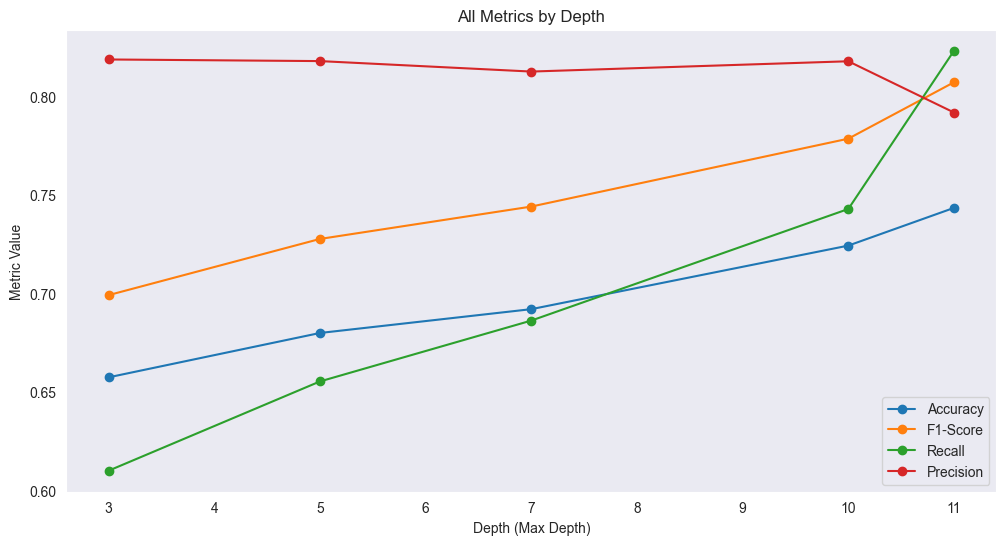

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import joblib

# Load the dataset
ufc_data_cleaned = pd.read_csv('../data/processed/ufc_data_final.csv')

# Encode the target variable
ufc_data_cleaned['red_wins'] = (ufc_data_cleaned['winner'] == 'Red').astype(int)

# Define features and target
# features = [
#     'r_age', 'b_age',
#     'r_height', 'b_height',
#     'r_weight', 'b_weight',
#     'r_reach', 'b_reach',
#     'r_wins_total', 'b_wins_total',
#     'r_losses_total', 'b_losses_total',
#     'r_SLpM_total', 'b_SLpM_total',
#     'r_SApM_total', 'b_SApM_total',
#     'r_sig_str_acc_total', 'b_sig_str_acc_total',
#     'r_td_acc_total', 'b_td_acc_total',
#     'r_td_def_total', 'b_td_def_total',
#     'r_sub_avg', 'b_sub_avg',
#     'r_td_avg', 'b_td_avg', 'r_str_def_total', 'b_str_def_total', 'wins_total_diff', 'age_diff'
# ]
features = [
    'r_age', 'b_age',
    'r_height', 'b_height',
    'r_weight', 'b_weight',
    'r_reach', 'b_reach',
    'r_wins_total', 'b_wins_total',
    'r_losses_total', 'b_losses_total',
    'r_SLpM_total', 'b_SLpM_total',
    'r_SApM_total', 'b_SApM_total',
    'r_td_acc_total', 'b_td_acc_total',
    'r_td_def_total', 'b_td_def_total',
    'r_sub_avg', 'b_sub_avg',
    'r_td_avg', 'b_td_avg', 'r_str_def_total', 'b_str_def_total', 'wins_total_diff', 'age_diff'
]

X = ufc_data_cleaned[features]
y = ufc_data_cleaned['red_wins']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define depths and criteria for evaluation
selected_depths = [3, 5, 7, 10, None]
criteria = ['gini', 'entropy']
results = []

# Train and evaluate models for each depth and criterion
for depth in selected_depths:
    for criterion in criteria:
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=depth,
            criterion=criterion,
            random_state=42
        )
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        results.append({
            'Criterion': criterion,
            'Depth': depth if depth else 'Unlimited',
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Precision': precision,
            'Recall': recall
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n=== Summary of Results ===")
print(results_df)

# Replace 'Unlimited' with a numeric value for consistent plotting
results_df['Depth'] = results_df['Depth'].replace('Unlimited', 11).astype(float)

# Plot all metrics on one graph by depth
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'F1-Score', 'Recall', 'Precision']
for metric in metrics:
    plt.plot(
        results_df.groupby('Depth')[metric].mean().index,
        results_df.groupby('Depth')[metric].mean(),
        marker='o',
        label=metric
    )

plt.title("All Metrics by Depth")
plt.xlabel("Depth (Max Depth)")
plt.ylabel("Metric Value")
plt.legend()
plt.grid()
plt.show()

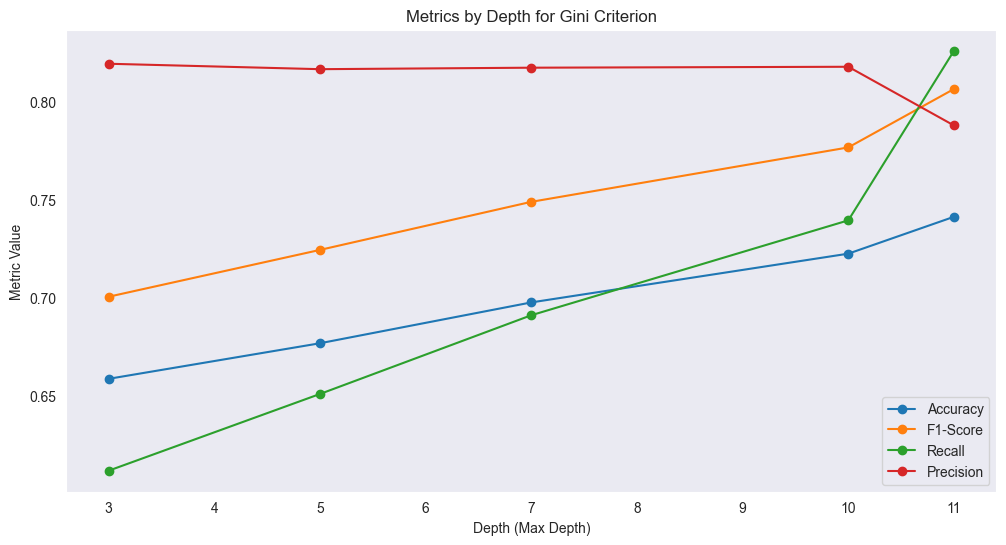

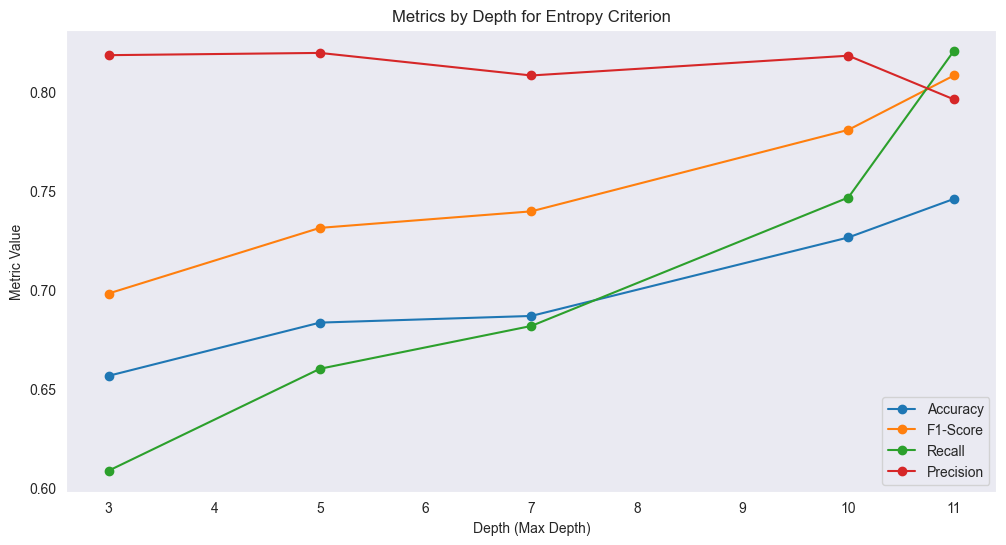

In [28]:
# Plot metrics by depth for each criterion
for criterion in criteria:
    plt.figure(figsize=(12, 6))
    subset = results_df[results_df['Criterion'] == criterion]
    for metric in metrics:
        plt.plot(
            subset['Depth'],
            subset[metric],
            marker='o',
            label=metric
        )

    plt.title(f"Metrics by Depth for {criterion.capitalize()} Criterion")
    plt.xlabel("Depth (Max Depth)")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid()
    plt.show()


In [29]:

# Function to train and save a custom model
def train_and_save_model(max_depth=None, criterion="gini", n_estimators=100,
                         save_path="../models/custom_random_forest_model.pkl"):

    # Train the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        criterion=criterion,
        random_state=42
    )
    model.fit(X_train_resampled, y_train_resampled)

    # Save the model
    joblib.dump(model, save_path)
    print(f"Model saved to {save_path}")

# Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Class balance
    red_win_ratio = y_train_resampled.mean() * 100
    blue_win_ratio = 100 - red_win_ratio

    # Display key information
    print("\n=== Model Information ===")
    print(f"Criterion: {criterion.capitalize()}")
    print(f"Max Depth: {'Unlimited' if max_depth is None else max_depth}")
    print(f"Number of Estimators: {n_estimators}")
    print("\n=== Class Balance After SMOTE ===")
    print(f"Red Wins: {red_win_ratio:.2f}%")
    print(f"Blue Wins: {blue_win_ratio:.2f}%")
    print("\n=== Model Performance on Test Data ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
# Example usage
train_and_save_model(max_depth=7, criterion="gini", n_estimators=1000,
                     save_path="../models/without_2_atributs.pkl")


Model saved to ../models/without_2_atributs.pkl

=== Model Information ===
Criterion: Gini
Max Depth: 7
Number of Estimators: 1000

=== Class Balance After SMOTE ===
Red Wins: 50.00%
Blue Wins: 50.00%

=== Model Performance on Test Data ===
Accuracy: 0.7009
F1-Score: 0.7529
Precision: 0.8169
Recall: 0.6982
